In [53]:
import pandas as pd

df = pd.read_csv('./Churn_Modelling.csv')

In [54]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [55]:
df.drop(columns=['CustomerId', 'RowNumber', 'Surname'], inplace=True)

In [56]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [57]:
for col in df:
    if df[col].dtype == 'object':
        print(f'{col}: {df[col].unique()}')

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [58]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [59]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [60]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [61]:
geo = pd.get_dummies(df['Geography']).astype('int')

In [62]:
geo

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


In [63]:
df.drop(columns='Geography', inplace=True)

In [64]:
df = pd.concat([df, geo], axis='columns')

In [65]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,619,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [66]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [67]:
df['Gender'].replace({'Male':1, 'Female':0}, inplace=True)

In [68]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [69]:
excited_Yes = df[df['Exited'] == 1].Tenure	
excited_No = df[df['Exited'] == 1].Tenure	

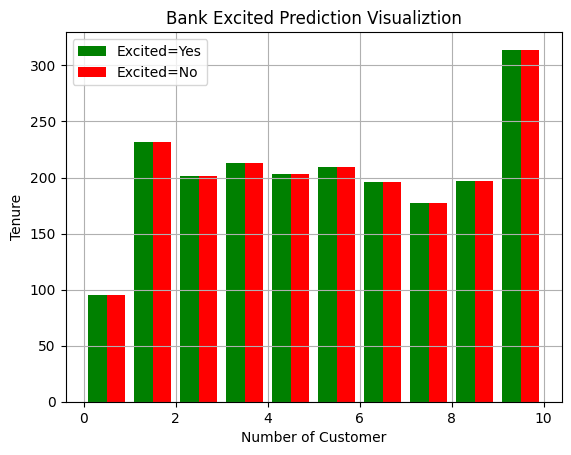

In [70]:
import matplotlib.pyplot as plt
plt.hist([excited_Yes, excited_No], color=['green', 'red'], label=['Excited=Yes','Excited=No'])
plt.title("Bank Excited Prediction Visualiztion")
plt.xlabel("Number of Customer")
plt.ylabel("Tenure")
plt.grid(True)
plt.legend()
plt.show()

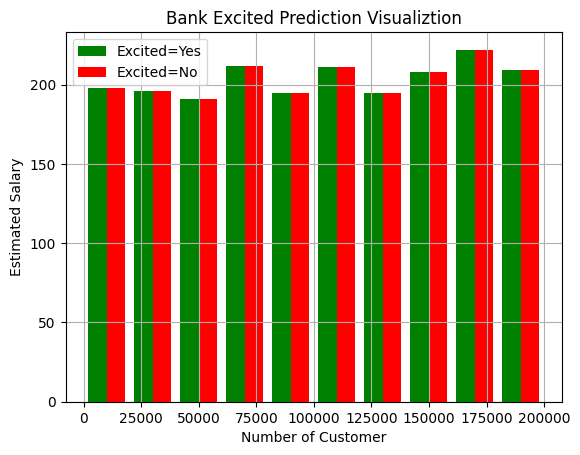

In [71]:
S_excited_Yes = df[df['Exited'] == 1].EstimatedSalary	
S_excited_No = df[df['Exited'] == 1].EstimatedSalary	
plt.hist([S_excited_Yes, S_excited_No], color=['green', 'red'], label=['Excited=Yes','Excited=No'])
plt.title("Bank Excited Prediction Visualiztion")
plt.xlabel("Number of Customer")
plt.ylabel("Estimated Salary")
plt.grid(True)
plt.legend()
plt.show()

In [72]:
df.dtypes

CreditScore          int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
France               int32
Germany              int32
Spain                int32
dtype: object

In [73]:
df.head()
df.shape

(10000, 13)

In [74]:
from sklearn.preprocessing import MinMaxScaler
minmiax = MinMaxScaler()
col_to_scale = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
df[col_to_scale] = minmiax.fit_transform(df[col_to_scale])

df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,0.538,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0
1,0.516,0,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1
2,0.304,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0
3,0.698,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0
4,1.000,0,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1


In [75]:
from sklearn.model_selection import train_test_split


X = df.drop(columns='Exited', axis='columns')
Y = df['Exited']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [76]:
x_train.shape

(8000, 12)

In [77]:
x_test.shape

(2000, 12)

In [78]:
len(x_train.columns)

12

In [79]:
from tensorflow import keras

In [80]:
model = keras.Sequential([
    keras.layers.Dense(12,input_shape=(12,),activation='relu'),
    keras.layers.Dense(9,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')])

In [81]:
model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

In [82]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
250/250 [==============================] - 2s 2ms/step - loss: 0.5138 - accuracy: 0.7915
Epoch 2/5
250/250 [==============================] - 1s 2ms/step - loss: 0.4699 - accuracy: 0.7980
Epoch 3/5
250/250 [==============================] - 1s 4ms/step - loss: 0.4566 - accuracy: 0.8018
Epoch 4/5
250/250 [==============================] - 1s 3ms/step - loss: 0.4461 - accuracy: 0.8058
Epoch 5/5
250/250 [==============================] - 1s 3ms/step - loss: 0.4370 - accuracy: 0.8102


In [83]:
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4314 - accuracy: 0.8112
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4283 - accuracy: 0.8125
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4259 - accuracy: 0.8148
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4234 - accuracy: 0.8151
Epoch 5/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4211 - accuracy: 0.8184
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4176 - accuracy: 0.8188
Epoch 7/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4154 - accuracy: 0.8216
Epoch 8/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4131 - accuracy: 0.8246
Epoch 9/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4099 - accuracy: 0.8254
Epoch 10/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4061 - accura

In [84]:
model.evaluate(x_test, y_test)

63/63 [==============================] - 0s 3ms/step - loss: 0.3410 - accuracy: 0.8625


[0.3409692943096161, 0.862500011920929]

In [86]:
yp = model.predict(x_test)
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

63/63 [==============================] - 0s 3ms/step


In [88]:
y_pred[:10]

[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

In [89]:
y_test[:10]

7018    1
3365    1
1007    0
8696    0
4704    0
1527    0
2363    0
9596    0
5433    0
6427    0
Name: Exited, dtype: int64

In [90]:
from sklearn.metrics import classification_report


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1586
           1       0.81      0.44      0.57       414

    accuracy                           0.86      2000
   macro avg       0.84      0.71      0.74      2000
weighted avg       0.86      0.86      0.85      2000



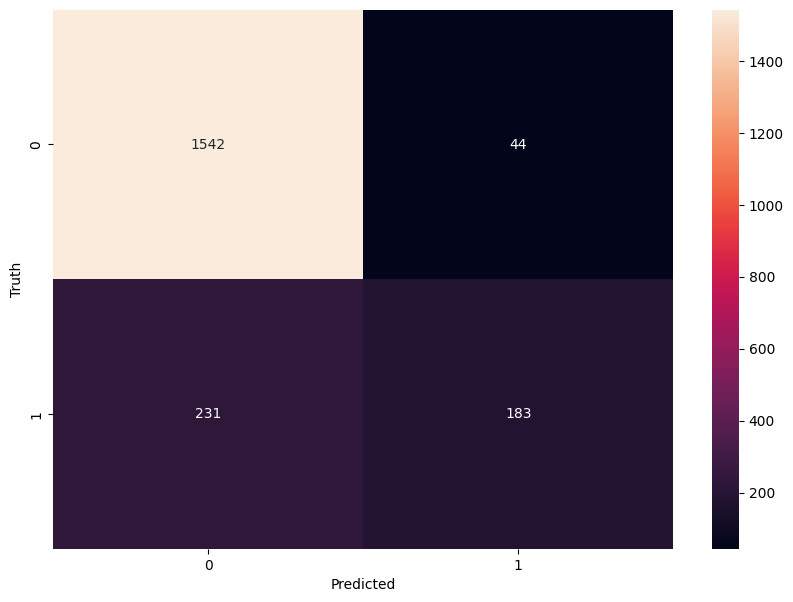

In [91]:
import seaborn as sns
import tensorflow as tf
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel("Truth")
plt.show()